# Funtions Testing for API:


**`Desarrollo API`**:   Propones disponibilizar los datos de la empresa usando el framework ***FastAPI***. Las consultas que propones son las siguientes:

Deben crear 6 funciones para los endpoints que se consumirán en la API, recuerden que deben tener un decorador por cada una (@app.get(‘/’)).
  
+ def **peliculas_idioma( *`Idioma`: str* )**:
    Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). Debe devolver la cantidad de películas producidas en ese idioma.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *`X` cantidad de películas fueron estrenadas en `idioma`*
         

+ def **peliculas_duracion( *`Pelicula`: str* )**:
    Se ingresa una pelicula. Debe devolver la duracion y el año.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *`X` . Duración: `x`. Año: `xx`*

+ def **franquicia( *`Franquicia`: str* )**:
    Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *La franquicia `X` posee `X` peliculas, una ganancia total de `x` y una ganancia promedio de `xx`*

+ def **peliculas_pais( *`Pais`: str* )**:
    Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!), retornando la cantidad de peliculas producidas en el mismo.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *Se produjeron `X` películas en el país `X`*

+ def **productoras_exitosas( *`Productora`: str* )**:
    Se ingresa la productora, entregandote el revunue total y la cantidad de peliculas que realizo. 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *La productora `X` ha tenido un revenue de `x`*

+ def **get_director( *`nombre_director`* )**:
    Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, en formato lista.



<br/>


> `Importante`<br>
El MVP _tiene_ que ser una API que pueda ser consumida segun los criterios de [API REST o RESTful](https://rockcontent.com/es/blog/api-rest/). Algunas herramientas como por ejemplo, Streamlit, si bien pueden brindar una interfaz de consulta, no cumplen con las condiciones para ser consideradas una API, sin workarounds.


**`Deployment`**: Conoces sobre [Render](https://render.com/docs/free#free-web-services) y tienes un [tutorial de Render](https://github.com/HX-FNegrete/render-fastapi-tutorial) que te hace la vida mas facil :smile: . Tambien podrias usar [Railway](https://railway.app/), o cualquier otro servicio que permita que la API pueda ser consumida desde la web.

<br/>

**`Análisis exploratorio de los datos`**: _(Exploratory Data Analysis-EDA)_

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente :eyes: ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de recomendación! En esta ocasión vamos a pedirte que no uses librerías para hacer EDA automático ya que queremos que pongas en practica los conceptos y tareas involucrados en el mismo. Puedes leer un poco más sobre EDA en [este articulo](https://medium.com/swlh/introduction-to-exploratory-data-analysis-eda-d83424e47151)

**`Sistema de recomendación`**: 

Una vez que toda la data es consumible por la API, está lista para consumir por los departamentos de Analytics y Machine Learning, y nuestro EDA nos permite entender bien los datos a los que tenemos acceso, es hora de entrenar nuestro modelo de machine learning para armar un sistema de recomendación de películas. El EDA debería incluir gráficas interesantes para extraer datos, como por ejemplo una nube de palabras con las palabras más frecuentes en los títulos de las películas. Éste consiste en recomendar películas a los usuarios basándose en películas similares, por lo que se debe encontrar la similitud de puntuación entre esa película y el resto de películas, se ordenarán según el score de similaridad y devolverá una lista de Python con 5 valores, cada uno siendo el string del nombre de las películas con mayor puntaje, en orden descendente. Debe ser deployado como una función adicional de la API anterior y debe llamarse:


+ def **recomendacion( *`titulo`* )**:
    Se ingresa el nombre de una película y te recomienda las similares en una lista de 5 valores.

<br/>


### Import Libraries:

In [409]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


### Import Input Data:

### df_movies:

In [410]:
# Cargar el archivo pickle como DataFrame de pandas
df_movies = pd.read_pickle('../../Datasets_Cleaned_light/df_movies.pkl')
df_movies.head(2)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,30000000.0,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection
1,65000000.0,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection


In [411]:
df_movies.shape

(52769, 23)

In [412]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52769 entries, 0 to 52768
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        52763 non-null  float64       
 1   id                            52769 non-null  int64         
 2   original_language             52769 non-null  object        
 3   overview                      52769 non-null  object        
 4   popularity                    52769 non-null  float64       
 5   release_date                  52671 non-null  datetime64[ns]
 6   revenue                       52769 non-null  int64         
 7   runtime                       52769 non-null  int64         
 8   status                        52769 non-null  object        
 9   title                         52769 non-null  object        
 10  vote_average                  52769 non-null  float64       
 11  vote_count                  

### df_movies_directors:

In [413]:
# Cargar el archivo pickle como DataFrame de pandas
df_movies_directors = pd.read_pickle('../../Datasets_Cleaned_light/df_movies_directors.pkl')
df_movies_directors.head(2)

,budget,movie_id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name,directors_id,directors_names
0,30000000.0,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection,[7879],[John Lasseter]
1,65000000.0,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection,[4945],[Joe Johnston]


In [414]:
df_movies_directors.shape

(51614, 25)

In [415]:
df_movies_directors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51614 entries, 0 to 52616
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   budget                        51614 non-null  float64       
 1   movie_id                      51614 non-null  int64         
 2   original_language             51614 non-null  object        
 3   overview                      51614 non-null  object        
 4   popularity                    51614 non-null  float64       
 5   release_date                  51614 non-null  datetime64[ns]
 6   revenue                       51614 non-null  int64         
 7   runtime                       51614 non-null  int64         
 8   status                        51614 non-null  object        
 9   title                         51614 non-null  object        
 10  vote_average                  51614 non-null  float64       
 11  vote_count                    516

### Dataset complementario: iso_language_data
#### Fuente: https://datahub.io/core/language-codes

In [416]:

# URL del enlace de descarga del archivo CSV
url = "https://datahub.io/core/language-codes/r/language-codes.csv"

try:
    # Cargar el archivo CSV desde el enlace de descarga
    iso_language_data = pd.read_csv(url)

    # Ahora tienes el contenido del archivo CSV en un DataFrame llamado 'df'
    # Puedes realizar operaciones o análisis con el DataFrame como desees.
    print(iso_language_data.head())  # Imprimir las primeras filas del DataFrame

except Exception as e:
    print("Error al cargar el archivo CSV desde el enlace:", e)

  alpha2    English
0     aa       Afar
1     ab  Abkhazian
2     ae    Avestan
3     af  Afrikaans
4     ak       Akan


In [417]:
iso_language_data.rename(columns={'alpha2': 'iso_language_code', 'English': 'language_name'}, inplace=True)

In [418]:
iso_language_data

,iso_language_code,language_name
0,aa,Afar
1,ab,Abkhazian
2,ae,Avestan
3,af,Afrikaans
4,ak,Akan
...,...,...
179,yi,Yiddish
180,yo,Yoruba
181,za,Zhuang; Chuang
182,zh,Chinese


### + def **peliculas_idioma( *`Idioma`: str* )**:
    Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). Debe devolver la cantidad de películas producidas en ese idioma.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *`X` cantidad de películas fueron estrenadas en `idioma`*

#### Algunos procedimientos antes de ETL para dejar listo dataframe para consultas de la F1

In [419]:
df_movies.head(2)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,30000000.0,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],['en'],['english'],1995,12.451801,toy story collection
1,65000000.0,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"['en', 'fr']","['english', 'français']",1995,4.043035,not part of a collection


In [420]:
df_languages = df_movies.loc[:, ['iso_language_codes']]

In [421]:
df_languages.head(10)

,iso_language_codes
0,['en']
1,"['en', 'fr']"
2,['en']
3,['en']
4,['en']
5,"['en', 'es']"
6,"['fr', 'en']"
7,"['en', 'de']"
8,['en']
9,"['en', 'ru', 'es']"


In [422]:
df_languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52769 entries, 0 to 52768
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   iso_language_codes  52769 non-null  object
dtypes: object(1)
memory usage: 412.4+ KB


In [423]:
import pandas as pd

# Suponiendo que ya tienes el DataFrame df_movies con la columna 'iso_language_codes'

# Convertir los valores en la columna 'iso_language_codes' a listas
df_movies['iso_language_codes'] = df_movies['iso_language_codes'].apply(eval)

# Contar la cantidad de veces que aparece cada idioma
language_counts = df_movies['iso_language_codes'].explode().value_counts()

# Convertir el conteo en un nuevo DataFrame
df_language_counts = pd.DataFrame({'iso_language_code': language_counts.index, 'count': language_counts.values})

print(df_language_counts)



    iso_language_code  count
0                  en  30814
1                  fr   4779
2                  ja   3516
3                  ru   3126
4                  de   3098
..                ...    ...
128                sn      1
129                bi      1
130                ha      1
131                ig      1
132                ty      1

[133 rows x 2 columns]


In [424]:
df_language_counts

,iso_language_code,count
0,en,30814
1,fr,4779
2,ja,3516
3,ru,3126
4,de,3098
...,...,...
128,sn,1
129,bi,1
130,ha,1
131,ig,1


#### Merge dataset complementario so idiomas 

In [425]:
df_f1_lang_movie_count = pd.merge(df_language_counts, iso_language_data , on='iso_language_code', how='left')

In [426]:
df_f1_lang_movie_count

,iso_language_code,count,language_name
0,en,30814,English
1,fr,4779,French
2,ja,3516,Japanese
3,ru,3126,Russian
4,de,3098,German
...,...,...,...
128,sn,1,Shona
129,bi,1,Bislama
130,ha,1,Hausa
131,ig,1,Igbo


In [427]:
# Convertir todas las celdas a minúsculas en df_f1_lang_movie_count
df_f1_lang_movie_count = df_f1_lang_movie_count.applymap(lambda x: str(x).lower())

# Verificar el resultado
print(df_f1_lang_movie_count)


    iso_language_code  count language_name
0                  en  30814       english
1                  fr   4779        french
2                  ja   3516      japanese
3                  ru   3126       russian
4                  de   3098        german
..                ...    ...           ...
128                sn      1         shona
129                bi      1       bislama
130                ha      1         hausa
131                ig      1          igbo
132                ty      1      tahitian

[133 rows x 3 columns]


#### Guardo dataframe:

In [428]:
df_f1_lang_movie_count.to_pickle('../../Datasets_Cleaned_light/df_f1_lang_movie_count.pkl')


#### Funcion 1:

In [429]:
def print_language_count(language_name):
    # Filtrar el DataFrame para obtener las filas que corresponden al language_name proporcionado
    filtered_df = df_f1_lang_movie_count[df_f1_lang_movie_count['language_name'] == language_name]
    
    if not filtered_df.empty:
        # Obtener los valores del iso_language_code y el conteo
        iso_language_code = filtered_df['iso_language_code'].values[0]
        count = filtered_df['count'].values[0]
        
        # Imprimir los resultados
        print(f"Nombre del lenguaje: {language_name}")
        print(f"ISO Language Code: {iso_language_code}")
        print(f"Movies count: {count}")
    else:
        print(f"No se encontró el lenguaje: {language_name}")

# Ejemplo de uso
language_name_to_find = "English"
print_language_count(language_name_to_find)

No se encontró el lenguaje: English


__________________________________________________________

### + def **peliculas_duracion( *`Pelicula`: str* )**:
    Se ingresa una pelicula. Debe devolver la duracion y el año.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *`X` . Duración: `x`. Año: `xx`*


#### df_movies calling..

In [430]:
df_runtime = df_movies[['title','runtime', 'release_year']]

In [431]:
df_runtime = df_runtime.drop_duplicates()

In [432]:
df_runtime

,title,runtime,release_year
0,toy story,81,1995
1,jumanji,104,1995
2,grumpier old men,101,1995
3,waiting to exhale,127,1995
4,father of the bride part ii,106,1995
...,...,...,...
52670,true,10,2004
52728,między nami dobrze jest,0,2014
52729,"włatcy móch. ćmoki, czopki i mondzioły",94,2009
52738,іван сила,80,2013


#### Guardo dataframe:

In [433]:
df_runtime.to_pickle('../../Datasets_Cleaned_light/df_f2_movies_runtime.pkl')


#### Funcion 2:

In [434]:

def print_movie_runtime(movie_name):
    # Filtrar el DataFrame para obtener la fila que corresponde al nombre de la película proporcionado
    filtered_df = df_runtime[df_runtime['title'] == movie_name]
    
    if not filtered_df.empty:
        # Obtener el valor del runtime
        runtime = filtered_df['runtime'].values[0]
        year = filtered_df['release_year'].values[0]
        # Imprimir el resultado
        print(f"Nombre de la película: {movie_name}")
        print(f"Runtime: {runtime} minutos")
        print(f"Lanzada en: {year} minutos")
    else:
        print(f"No se encontró la película: {movie_name}")

# Ejemplo de uso
movie_name_to_find = "jumanji"
print_movie_runtime(movie_name_to_find)

Nombre de la película: jumanji
Runtime: 104 minutos
Lanzada en: 1995 minutos


__________________________________________________

### + def **franquicia( *`Franquicia`: str* )**:
    Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *La franquicia `X` posee `X` peliculas, una ganancia total de `x` y una ganancia promedio de `xx`*


#### Masking and making new df_f3:

In [435]:
df_f3_collection_name_returns = df_movies[['collection_name','id','title','return']]

In [436]:
# Agrupar por 'collection_name'
df_f3_collection_name_returns = df_f3_collection_name_returns.groupby('collection_name').agg({
    'id': list,
    'title': list,
    'return': ['sum', 'mean']
}).reset_index()

# Renombrar las columnas del DataFrame resultante
df_f3_collection_name_returns.columns = ['collection_name', 'id_list', 'title_list', 'return_sum', 'return_mean']

df_f3_collection_name_returns.head()

,collection_name,id_list,title_list,return_sum,return_mean
0,... has fallen collection,"[117263, 267860, 117263]","[olympus has fallen, london has fallen, olympu...",8.029973,2.676658
1,00 schneider filmreihe,[1652],[00 schneider - jagd auf nihil baxter],2.653365,2.653365
2,08/15 collection,[19430],[08/15],2.653365,2.653365
3,100 girls collection,"[10035, 20648]","[100 girls, 100 women]",5.306730,2.653365
4,101 dalmatians (animated) collection,"[12230, 13654]","[one hundred and one dalmatians, 101 dalmatian...",56.623368,28.311684


#### Guardo Dataframe:

In [437]:
df_f3_collection_name_returns.to_pickle('../../Datasets_Cleaned_light/df_f3_collection_name_returns.pkl')

#### Funcion 3:

In [438]:
def franquicia(collection_name: str):
    # Filtrar los datos en función del valor de la columna 'collection_name'
    df_return = df_f3_collection_name_returns[df_f3_collection_name_returns['collection_name'] == collection_name]

    # Verificar si la colección fue encontrada
    if df_return.empty:
        print(f"No se encontró la colección '{collection_name}' en el dataframe.")
        return

    # Calcular la cantidad de películas
    cantidad_peliculas = df_return['id_list'].apply(len).sum()

    # Calcular la ganancia total
    ganancia_total = df_return['return_sum'].sum()

    # Calcular la ganancia promedio
    ganancia_promedio = df_return['return_mean'].mean()

    # Imprimir el resultado
    print(f"La franquicia {collection_name} posee {cantidad_peliculas} películas, una ganancia total de {ganancia_total:.2f} y una ganancia promedio de {ganancia_promedio:.2f}, aproximadamente...")

# Ejemplo de uso de la función con el dataframe proporcionado
franquicia('00 schneider filmreihe')


La franquicia 00 schneider filmreihe posee 1 películas, una ganancia total de 2.65 y una ganancia promedio de 2.65, aproximadamente...


### + def **peliculas_pais( *`Pais`: str* )**:
    Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!), retornando la cantidad de peliculas producidas en el mismo.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nb

#### creodataset para df_f4_production_countrys

In [439]:
df_f4_production_countrys = pd.DataFrame({
    'country_names': df_movies['country_names']
})


In [440]:
df_f4_production_countrys.head(20)

,country_names
0,['united states of america']
1,['united states of america']
2,['united states of america']
3,['united states of america']
4,['united states of america']
5,['united states of america']
6,"['germany', 'united states of america']"
7,['united states of america']
8,['united states of america']
9,"['united kingdom', 'united states of america']"


In [441]:

# Convertir la columna 'country_names' en listas si no lo es
df_f4_production_countrys['country_names'] = df_f4_production_countrys['country_names'].apply(eval)

# Aplicar el método explode para separar las listas en filas individuales
df_f4_production_countrys = df_f4_production_countrys.explode('country_names')



In [442]:
df_f4_production_countrys.head(20)

,country_names
0,united states of america
1,united states of america
2,united states of america
3,united states of america
4,united states of america
5,united states of america
6,germany
6,united states of america
7,united states of america
8,united states of america


#### Guardo df_f4_production_countrys:

In [443]:
df_f4_production_countrys.to_pickle('../../Datasets_Cleaned_light/df_f4_production_countrys.pkl')

#### Funcion 4:

In [444]:
def peliculas_pais(pais: str) -> int:
    # Contar las películas producidas en el país proporcionado
    pais = pais.lower()
    count = df_f4_production_countrys[df_f4_production_countrys['country_names'] == pais].count()
    return count

# Ejemplo de uso:
pais_ingresado = 'Argentina' 
cantidad_peliculas = peliculas_pais(pais_ingresado)
print(f"Se han producido {cantidad_peliculas} películas en {pais_ingresado}.")



Se han producido country_names    263
dtype: int64 películas en Argentina.


### + def **productoras_exitosas( *`Productora`: str* )**:
    Se ingresa la productora, entregandote el revunue total y la cantidad de peliculas que realizo. 
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ejemplo de retorno: *La productora `X` ha tenido un revenue de `x`*

#### DATASET:

In [445]:
pd.set_option('display.max_columns', None)

In [446]:
df_movies.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],[en],['english'],1995,12.451801,toy story collection
1,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"[en, fr]","['english', 'français']",1995,4.043035,not part of a collection
2,4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,grumpier old men,6.5,92,"[10749, 35]","['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],[en],['english'],1995,2.653365,grumpy old men collection


In [447]:

df_f5_production_companies_return = df_movies[['production_companies_ids','production_companies_nombres','id','title','budget','revenue','return']]


In [448]:
df_f5_production_companies_return

,production_companies_ids,production_companies_nombres,id,title,budget,revenue,return
0,[3],['pixar animation studios'],862,toy story,3.000000e+07,373554033,12.451801
1,"[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",8844,jumanji,6.500000e+07,262797249,4.043035
2,"[6194, 19464]","['warner bros.', 'lancaster gate']",15602,grumpier old men,4.224579e+06,11209348,2.653365
3,[306],['twentieth century fox film corporation'],31357,waiting to exhale,1.600000e+07,81452156,5.090760
4,"[5842, 9195]","['sandollar productions', 'touchstone pictures']",11862,father of the bride part ii,4.224579e+06,76578911,18.126993
...,...,...,...,...,...,...,...
52764,"[3451, 16688, 16689]","['art pictures studio', 'art pictures group', ...",63266,phobos. fear kills,4.224579e+06,11209348,2.653365
52765,[45867],['star film company'],49280,the one-man band,4.224579e+06,11209348,2.653365
52766,[7159],['star-film'],106807,the fat and lean wrestling match,4.224579e+06,11209348,2.653365
52767,"[82459, 88831]","['mad films', 'third eye pictures']",404604,mom,4.224579e+06,11209348,2.653365


In [449]:
df_f5_production_companies_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52769 entries, 0 to 52768
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   production_companies_ids      52769 non-null  object 
 1   production_companies_nombres  52769 non-null  object 
 2   id                            52769 non-null  int64  
 3   title                         52769 non-null  object 
 4   budget                        52763 non-null  float64
 5   revenue                       52769 non-null  int64  
 6   return                        52769 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.8+ MB


In [450]:
import ast

In [451]:

# Aplicar literal_eval a la columna 'production_companies_nombres'
df_f5_production_companies_return.loc[:,'production_companies_nombres']= df_f5_production_companies_return['production_companies_nombres'].apply(ast.literal_eval)

In [452]:
df_f5_production_companies_return

,production_companies_ids,production_companies_nombres,id,title,budget,revenue,return
0,[3],[pixar animation studios],862,toy story,3.000000e+07,373554033,12.451801
1,"[559, 2550, 10201]","[tristar pictures, teitler film, interscope co...",8844,jumanji,6.500000e+07,262797249,4.043035
2,"[6194, 19464]","[warner bros., lancaster gate]",15602,grumpier old men,4.224579e+06,11209348,2.653365
3,[306],[twentieth century fox film corporation],31357,waiting to exhale,1.600000e+07,81452156,5.090760
4,"[5842, 9195]","[sandollar productions, touchstone pictures]",11862,father of the bride part ii,4.224579e+06,76578911,18.126993
...,...,...,...,...,...,...,...
52764,"[3451, 16688, 16689]","[art pictures studio, art pictures group, task...",63266,phobos. fear kills,4.224579e+06,11209348,2.653365
52765,[45867],[star film company],49280,the one-man band,4.224579e+06,11209348,2.653365
52766,[7159],[star-film],106807,the fat and lean wrestling match,4.224579e+06,11209348,2.653365
52767,"[82459, 88831]","[mad films, third eye pictures]",404604,mom,4.224579e+06,11209348,2.653365


In [453]:
# Calculate the number of production companies in each row
df_f5_production_companies_return.loc[:,'participation_prod_comp'] = df_f5_production_companies_return['production_companies_nombres'].apply(len)

# Divide the last three columns by the number of production companies and use .loc for assignment
df_f5_production_companies_return.loc[:, 'budget_per_company'] = df_f5_production_companies_return['budget'] / df_f5_production_companies_return['participation_prod_comp']
df_f5_production_companies_return.loc[:, 'revenue_per_company'] = df_f5_production_companies_return['revenue'] / df_f5_production_companies_return['participation_prod_comp']
df_f5_production_companies_return.loc[:, 'return_per_company'] = df_f5_production_companies_return['return'] / df_f5_production_companies_return['participation_prod_comp']



C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\3104983078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f5_production_companies_return.loc[:,'participation_prod_comp'] = df_f5_production_companies_return['production_companies_nombres'].apply(len)
C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\3104983078.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f5_production_companies_return.loc[:, 'budget_per_company'] = df_f5_production_companies_return['budget'] / df_f5_production_companies_retu

In [454]:

# Explode de la columna de compañías de producción
df_f5_production_companies_return = df_f5_production_companies_return.explode("production_companies_nombres", ignore_index=True)

# Replazar el índice para mostrar solo los campos relevantes
df_f5_production_companies_return.reset_index(drop=True, inplace=True)


In [455]:
df_f5_production_companies_return.loc[:,'participation_prod_comp'] = df_f5_production_companies_return['participation_prod_comp'].fillna(1)

In [456]:
df_f5_production_companies_return.head(10)

,production_companies_ids,production_companies_nombres,id,title,budget,revenue,return,participation_prod_comp,budget_per_company,revenue_per_company,return_per_company
0,[3],pixar animation studios,862,toy story,3.000000e+07,373554033,12.451801,1,3.000000e+07,3.735540e+08,12.451801
1,"[559, 2550, 10201]",tristar pictures,8844,jumanji,6.500000e+07,262797249,4.043035,3,2.166667e+07,8.759908e+07,1.347678
2,"[559, 2550, 10201]",teitler film,8844,jumanji,6.500000e+07,262797249,4.043035,3,2.166667e+07,8.759908e+07,1.347678
3,"[559, 2550, 10201]",interscope communications,8844,jumanji,6.500000e+07,262797249,4.043035,3,2.166667e+07,8.759908e+07,1.347678
4,"[6194, 19464]",warner bros.,15602,grumpier old men,4.224579e+06,11209348,2.653365,2,2.112289e+06,5.604674e+06,1.326682
5,"[6194, 19464]",lancaster gate,15602,grumpier old men,4.224579e+06,11209348,2.653365,2,2.112289e+06,5.604674e+06,1.326682
6,[306],twentieth century fox film corporation,31357,waiting to exhale,1.600000e+07,81452156,5.090760,1,1.600000e+07,8.145216e+07,5.090760
7,"[5842, 9195]",sandollar productions,11862,father of the bride part ii,4.224579e+06,76578911,18.126993,2,2.112289e+06,3.828946e+07,9.063497
8,"[5842, 9195]",touchstone pictures,11862,father of the bride part ii,4.224579e+06,76578911,18.126993,2,2.112289e+06,3.828946e+07,9.063497
9,"[508, 675, 6194]",regency enterprises,949,heat,6.000000e+07,187436818,3.123947,3,2.000000e+07,6.247894e+07,1.041316


In [457]:

df_f5_production_companies_return = df_f5_production_companies_return.groupby('production_companies_nombres', as_index=False).agg({
    'budget_per_company': 'sum',
    'revenue_per_company': 'sum',
    'return_per_company': 'sum',
    'id': 'count'
})

In [458]:
# Assuming df_f5_production_companies_return is your DataFrame
df_f5_production_companies_return.rename(columns={'id': 'count_movies'}, inplace=True)



In [459]:
df_f5_production_companies_return

,production_companies_nombres,budget_per_company,revenue_per_company,return_per_company,count_movies
0,"""dia"" productions gmbh & co. kg",9.000000e+06,1.108773e+07,0.307993,1
1,# andrea sperling productions,1.250000e+06,5.604674e+06,2.241870,1
2,# lexyn productions,1.408193e+06,3.736449e+06,0.884455,1
3,'a' production committee,8.449158e+06,2.241870e+07,5.306730,2
4,(?)?????,5.000000e+06,1.120935e+07,2.241870,1
...,...,...,...,...,...
23525,영화사 집,4.224579e+06,1.120935e+07,2.653365,1
23526,이디오플랜,4.224579e+06,1.120935e+07,2.653365,1
23527,인벤트 디,4.224579e+06,1.120935e+07,2.653365,1
23528,타임스토리그룹,2.112289e+06,5.604674e+06,1.326682,1


#### Guardo pickle df_f5_production_companies_return:

In [460]:
df_f5_production_companies_return.to_pickle('../../Datasets_Cleaned_light/df_f5_production_companies_return.pkl')

#### Funcion 5:

In [461]:
import pandas as pd

def productoras_exitosas(productora: str):

    # Filtrar el dataframe para obtener los datos de la productora deseada
    productora_data = df_f5_production_companies_return[df_f5_production_companies_return['production_companies_nombres'].str.contains(productora, case=False, na=False)]

    # Verificar si la productora existe en el dataframe
    if productora_data.empty:
        return f"La productora '{productora}' no fue encontrada en el dataframe."

    # Calcular el revenue total de la productora
    revenue_total = productora_data['return_per_company'].sum()
    cant_movies = productora_data['count_movies'].sum()
    return f"La productora '{productora}' ha tenido un return de {round(revenue_total, 2)} aproximadamente, es decir, que ha multiplicado sus budget_totales unas {round(revenue_total, 0)} veces haciendo peliculas y ha realizado {cant_movies} peliculas..."

# Ejemplo de uso:
productora_buscada = "pixar"
resultados_productora = productoras_exitosas(productora_buscada)
print(resultados_productora)




La productora 'pixar' ha tenido un return de 138.31 aproximadamente, es decir, que ha multiplicado sus budget_totales unas 138.0 veces haciendo peliculas y ha realizado 54 peliculas...


### + def **get_director( *`nombre_director`* )**:
    Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, en formato lista.




#### Preparacion del dataframe 6 df_f6_get_director:

In [173]:

# Seleccionar las columnas 'director_id', 'directors_names' y 'movie_id'
df_f6_get_director = df_movies_directors[['directors_id', 'directors_names', 'movie_id','title','release_date','budget','revenue','return']]


In [174]:
df_f6_get_director.head()

,directors_id,directors_names,movie_id,title,release_date,budget,revenue,return
0,[7879],[John Lasseter],862,toy story,1995-10-30,3.000000e+07,373554033,12.451801
1,[4945],[Joe Johnston],8844,jumanji,1995-12-15,6.500000e+07,262797249,4.043035
2,[26502],[Howard Deutch],15602,grumpier old men,1995-12-22,4.224579e+06,11209348,2.653365
3,[2178],[Forest Whitaker],31357,waiting to exhale,1995-12-22,1.600000e+07,81452156,5.090760
4,[56106],[Charles Shyer],11862,father of the bride part ii,1995-02-10,4.224579e+06,76578911,18.126993


In [175]:
# Convert the 'directors_names' column to string
df_f6_get_director['directors_names'] = df_f6_get_director['directors_names'].astype(str)

C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\2237944773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f6_get_director['directors_names'] = df_f6_get_director['directors_names'].astype(str)


In [176]:

# Aplicar literal_eval a la columna 'production_companies_nombres'
df_f6_get_director.loc[:,'directors_names']= df_f6_get_director['directors_names'].apply(ast.literal_eval)

In [177]:
df_f6_get_director.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51614 entries, 0 to 52616
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   directors_id     51614 non-null  object        
 1   directors_names  51614 non-null  object        
 2   movie_id         51614 non-null  int64         
 3   title            51614 non-null  object        
 4   release_date     51614 non-null  datetime64[ns]
 5   budget           51614 non-null  float64       
 6   revenue          51614 non-null  int64         
 7   return           51614 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.5+ MB


In [178]:
df_f6_get_director.loc[:, 'participations'] = df_f6_get_director['directors_names'].apply(len)


C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\4036964803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f6_get_director.loc[:, 'participations'] = df_f6_get_director['directors_names'].apply(len)


In [179]:
df_f6_get_director.head(2)

,directors_id,directors_names,movie_id,title,release_date,budget,revenue,return,participations
0,[7879],[John Lasseter],862,toy story,1995-10-30,30000000.0,373554033,12.451801,1
1,[4945],[Joe Johnston],8844,jumanji,1995-12-15,65000000.0,262797249,4.043035,1


In [180]:
df_f6_get_director.loc[:,'participations'] = df_f6_get_director['participations'].fillna(1)

In [181]:

df_f6_get_director.loc[:,'director_budget'] = df_f6_get_director['budget'] /df_f6_get_director['participations']
df_f6_get_director.loc[:,'director_revenue'] = df_f6_get_director['revenue'] /df_f6_get_director['participations']
df_f6_get_director.loc[:,'director_return'] = df_f6_get_director['return'] /df_f6_get_director['participations']

C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\998896168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f6_get_director.loc[:,'director_budget'] = df_f6_get_director['budget'] /df_f6_get_director['participations']
C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\998896168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f6_get_director.loc[:,'director_revenue'] = df_f6_get_director['revenue'] /df_f6_get_director['participations']
C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\998896168.py:

In [182]:
df_f6_get_director.head(20)

,directors_id,directors_names,movie_id,title,release_date,budget,revenue,return,participations,director_budget,director_revenue,director_return
0,[7879],[John Lasseter],862,toy story,1995-10-30,3.000000e+07,373554033,12.451801,1,3.000000e+07,373554033.0,12.451801
1,[4945],[Joe Johnston],8844,jumanji,1995-12-15,6.500000e+07,262797249,4.043035,1,6.500000e+07,262797249.0,4.043035
2,[26502],[Howard Deutch],15602,grumpier old men,1995-12-22,4.224579e+06,11209348,2.653365,1,4.224579e+06,11209348.0,2.653365
3,[2178],[Forest Whitaker],31357,waiting to exhale,1995-12-22,1.600000e+07,81452156,5.090760,1,1.600000e+07,81452156.0,5.090760
4,[56106],[Charles Shyer],11862,father of the bride part ii,1995-02-10,4.224579e+06,76578911,18.126993,1,4.224579e+06,76578911.0,18.126993
5,[638],[Michael Mann],949,heat,1995-12-15,6.000000e+07,187436818,3.123947,1,6.000000e+07,187436818.0,3.123947
6,[2226],[Sydney Pollack],11860,sabrina,1995-12-15,5.800000e+07,11209348,0.193265,1,5.800000e+07,11209348.0,0.193265
7,[18357],[Peter Hewitt],45325,tom and huck,1995-12-22,4.224579e+06,11209348,2.653365,1,4.224579e+06,11209348.0,2.653365
8,[37710],[Peter Hyams],9091,sudden death,1995-12-22,3.500000e+07,64350171,1.838576,1,3.500000e+07,64350171.0,1.838576
9,[10702],[Martin Campbell],710,goldeneye,1995-11-16,5.800000e+07,352194034,6.072311,1,5.800000e+07,352194034.0,6.072311


In [183]:

# Explode de la columna de compañías de producción
df_f6_get_director = df_f6_get_director.explode("directors_names", ignore_index=True)

# Replazar el índice para mostrar solo los campos relevantes
df_f6_get_director.reset_index(drop=True, inplace=True)


In [184]:
df_f6_get_director.head(30)

,directors_id,directors_names,movie_id,title,release_date,budget,revenue,return,participations,director_budget,director_revenue,director_return
0,[7879],John Lasseter,862,toy story,1995-10-30,3.000000e+07,373554033,12.451801,1,3.000000e+07,373554033.0,12.451801
1,[4945],Joe Johnston,8844,jumanji,1995-12-15,6.500000e+07,262797249,4.043035,1,6.500000e+07,262797249.0,4.043035
2,[26502],Howard Deutch,15602,grumpier old men,1995-12-22,4.224579e+06,11209348,2.653365,1,4.224579e+06,11209348.0,2.653365
3,[2178],Forest Whitaker,31357,waiting to exhale,1995-12-22,1.600000e+07,81452156,5.090760,1,1.600000e+07,81452156.0,5.090760
4,[56106],Charles Shyer,11862,father of the bride part ii,1995-02-10,4.224579e+06,76578911,18.126993,1,4.224579e+06,76578911.0,18.126993
5,[638],Michael Mann,949,heat,1995-12-15,6.000000e+07,187436818,3.123947,1,6.000000e+07,187436818.0,3.123947
6,[2226],Sydney Pollack,11860,sabrina,1995-12-15,5.800000e+07,11209348,0.193265,1,5.800000e+07,11209348.0,0.193265
7,[18357],Peter Hewitt,45325,tom and huck,1995-12-22,4.224579e+06,11209348,2.653365,1,4.224579e+06,11209348.0,2.653365
8,[37710],Peter Hyams,9091,sudden death,1995-12-22,3.500000e+07,64350171,1.838576,1,3.500000e+07,64350171.0,1.838576
9,[10702],Martin Campbell,710,goldeneye,1995-11-16,5.800000e+07,352194034,6.072311,1,5.800000e+07,352194034.0,6.072311


In [185]:
# Eliminar la primera columna ('directors_id') del DataFrame
df_f6_get_director = df_f6_get_director.drop(columns=['directors_id'])

In [186]:
# Agrupar por 'directors_names' y obtener la suma de las últimas tres columnas (budget, revenue, return)
df_f6_get_director = df_f6_get_director.groupby('directors_names').agg({
    'director_budget': 'sum',
    'director_revenue': 'sum',
    'director_return': 'sum',
    'title': list,
    'release_date': list,
    'budget': 'sum',
    'revenue': 'sum',
    'return': 'sum'
}).reset_index()

In [187]:
df_f6_get_director

,directors_names,director_budget,director_revenue,director_return,title,release_date,budget,revenue,return
0,Dale Trevillion\t,1.372458e+07,22418696.0,3.833296,"[walkout, the three stooges]","[2006-03-18 00:00:00, 2000-04-24 00:00:00]",1.372458e+07,22418696,3.833296
1,Davide Manuli,4.224579e+06,11209348.0,2.653365,[which way is the front line from here? the li...,[2013-01-20 00:00:00],4.224579e+06,11209348,2.653365
2,E.W. Swackhamer,8.449158e+06,22418696.0,5.306730,"[eastern boys, eastern boys]","[2013-04-02 00:00:00, 2013-04-02 00:00:00]",8.449158e+06,22418696,5.306730
3,Vitaliy Vorobyov,8.449158e+06,22418696.0,5.306730,"[fb: fighting beat, fb: fighting beat]","[2007-01-01 00:00:00, 2007-01-01 00:00:00]",8.449158e+06,22418696,5.306730
4,Yeon Sang-Ho,2.534747e+07,67256088.0,15.920189,"[embracing, the three men of melita zganjer, t...","[1992-01-01 00:00:00, 1998-01-01 00:00:00, 201...",2.534747e+07,67256088,15.920189
...,...,...,...,...,...,...,...,...,...
19706,پیمان معادی,8.449158e+06,22418696.0,5.306730,"[the tale of zatôichi continues, the tale of z...","[1962-10-12 00:00:00, 1962-10-12 00:00:00]",8.449158e+06,22418696,5.306730
19707,塩谷 直義,4.224579e+06,11209348.0,2.653365,[the green inferno],[1988-05-01 00:00:00],4.224579e+06,11209348,2.653365
19708,张立 | Zhang Li,2.112289e+06,5604674.0,1.326682,[blood tide],[1982-09-01 00:00:00],4.224579e+06,11209348,2.653365
19709,杰森·莫玛,4.224579e+06,11209348.0,2.653365,[scanner cop],[1994-07-27 00:00:00],4.224579e+06,11209348,2.653365


In [188]:
# Obtener la cuenta de valores únicos en la columna 'mi_columna'
conteo_valores = df_f6_get_director['directors_names'].value_counts()

# Imprimir el conteo de valores únicos
print(conteo_valores)

# Verificar si algún valor se repite más de una vez
valores_repetidos = conteo_valores[conteo_valores > 1]

if not valores_repetidos.empty:
    print("Hay valores que se repiten más de una vez:")
    print(valores_repetidos)
else:
    print("No hay valores que se repitan más de una vez.")


directors_names
 Dale Trevillion\t     1
Milčo Mančevski        1
Min Kyu-dong           1
Min Joon-ki            1
Min Byung-chun         1
                      ..
Gregg Hale             1
Gregg Godfrey          1
Gregg Champion         1
Gregg C. Tallas        1
진모영                    1
Name: count, Length: 19711, dtype: int64
No hay valores que se repitan más de una vez.


#### Guardo dataframe df_f6_get_director

In [189]:
df_f6_get_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19711 entries, 0 to 19710
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   directors_names   19711 non-null  object 
 1   director_budget   19711 non-null  float64
 2   director_revenue  19711 non-null  float64
 3   director_return   19711 non-null  float64
 4   title             19711 non-null  object 
 5   release_date      19711 non-null  object 
 6   budget            19711 non-null  float64
 7   revenue           19711 non-null  int64  
 8   return            19711 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


In [190]:
df_f6_get_director.head(3)

,directors_names,director_budget,director_revenue,director_return,title,release_date,budget,revenue,return
0,Dale Trevillion\t,1.372458e+07,22418696.0,3.833296,"[walkout, the three stooges]","[2006-03-18 00:00:00, 2000-04-24 00:00:00]",1.372458e+07,22418696,3.833296
1,Davide Manuli,4.224579e+06,11209348.0,2.653365,[which way is the front line from here? the li...,[2013-01-20 00:00:00],4.224579e+06,11209348,2.653365
2,E.W. Swackhamer,8.449158e+06,22418696.0,5.306730,"[eastern boys, eastern boys]","[2013-04-02 00:00:00, 2013-04-02 00:00:00]",8.449158e+06,22418696,5.306730


In [191]:
# Aplicar str.lower() a todas las celdas del DataFrame
df_f6_get_director = df_f6_get_director.applymap(lambda x: x.lower() if isinstance(x, str) else x)

df_f6_get_director.head()

,directors_names,director_budget,director_revenue,director_return,title,release_date,budget,revenue,return
0,dale trevillion\t,1.372458e+07,22418696.0,3.833296,"[walkout, the three stooges]","[2006-03-18 00:00:00, 2000-04-24 00:00:00]",1.372458e+07,22418696,3.833296
1,davide manuli,4.224579e+06,11209348.0,2.653365,[which way is the front line from here? the li...,[2013-01-20 00:00:00],4.224579e+06,11209348,2.653365
2,e.w. swackhamer,8.449158e+06,22418696.0,5.306730,"[eastern boys, eastern boys]","[2013-04-02 00:00:00, 2013-04-02 00:00:00]",8.449158e+06,22418696,5.306730
3,vitaliy vorobyov,8.449158e+06,22418696.0,5.306730,"[fb: fighting beat, fb: fighting beat]","[2007-01-01 00:00:00, 2007-01-01 00:00:00]",8.449158e+06,22418696,5.306730
4,yeon sang-ho,2.534747e+07,67256088.0,15.920189,"[embracing, the three men of melita zganjer, t...","[1992-01-01 00:00:00, 1998-01-01 00:00:00, 201...",2.534747e+07,67256088,15.920189


In [193]:
df_f6_get_director.to_pickle('../../Datasets_Cleaned_light/df_f6_get_director.pkl')

In [194]:
df_f6_df_expanded = df_movies[['release_date','title', 'budget', 'revenue', 'return']]

In [195]:
df_f6_df_expanded


,release_date,title,budget,revenue,return
0,1995-10-30,toy story,3.000000e+07,373554033,12.451801
1,1995-12-15,jumanji,6.500000e+07,262797249,4.043035
2,1995-12-22,grumpier old men,4.224579e+06,11209348,2.653365
3,1995-12-22,waiting to exhale,1.600000e+07,81452156,5.090760
4,1995-02-10,father of the bride part ii,4.224579e+06,76578911,18.126993
...,...,...,...,...,...
52764,2010-03-25,phobos. fear kills,4.224579e+06,11209348,2.653365
52765,1900-01-01,the one-man band,4.224579e+06,11209348,2.653365
52766,1900-01-01,the fat and lean wrestling match,4.224579e+06,11209348,2.653365
52767,2017-07-07,mom,4.224579e+06,11209348,2.653365


#### Guardo df_f6_df_expanded.pkl:

In [197]:
df_f6_df_expanded.to_pickle('../../Datasets_Cleaned_light/df_f6_df_expanded.pkl')

In [198]:
df_f6_get_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19711 entries, 0 to 19710
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   directors_names   19711 non-null  object 
 1   director_budget   19711 non-null  float64
 2   director_revenue  19711 non-null  float64
 3   director_return   19711 non-null  float64
 4   title             19711 non-null  object 
 5   release_date      19711 non-null  object 
 6   budget            19711 non-null  float64
 7   revenue           19711 non-null  int64  
 8   return            19711 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.4+ MB


### Funcion 6:

In [199]:
import itertools

def get_director(nombre_director):
    if df_f6_get_director[df_f6_get_director['directors_names'] == nombre_director].empty:
        print('No encontramos el director en el set de datos...')
        return None
    else:

        director_df_resume = df_f6_get_director[df_f6_get_director['directors_names'] == nombre_director]
        retorno_total_director = round(director_df_resume['director_return'].iloc[0])
        
        movies_titles = director_df_resume['title']
        flattened_titles = list(itertools.chain(*movies_titles))

        movies_release_date = director_df_resume['release_date']

        retorno_total_movies = round(director_df_resume['return'].iloc[0])
        budget_pelicula = round(director_df_resume['budget'].iloc[0])
        revenue_pelicula = round(director_df_resume['revenue'].iloc[0])

        for movie in flattened_titles:
            movie_search_df = df_f6_df_expanded[df_f6_df_expanded['title'] == movie]
            lista_movie_b_r_r = movie_search_df[['title', 'release_date', 'budget', 'revenue', 'return']].to_records(index=False)
            print(f'Listado de info peliculas para el director {nombre_director}')
            print(f'retorno_total_director: {retorno_total_director}')
            print(f'Listado de peliculas: {flattened_titles}')
            print(f'Listado de fechas para las peliculas retornadas: {movies_release_date}')
            print(f'Listado de Returns para las peliculas retornadas: {retorno_total_movies}')
            print(f'Listado de Revenues para las peliculas retornadas: {revenue_pelicula}')
            print(f'Listado de Budgets para las peliculas retornadas: {budget_pelicula}')
            
        
        return {'director': nombre_director, 'retorno_total_director': retorno_total_director, 
                'peliculas': flattened_titles, 'fechas de lanzamiento': movies_release_date, 'retorno_peliculas': retorno_total_movies, 
                'budget_peliculas': budget_pelicula, 'revenue_peliculas': revenue_pelicula}

get_director('quentin tarantino')

Listado de info peliculas para el director quentin tarantino
retorno_total_director: 74
Listado de peliculas: ['four rooms', 'pulp fiction', 'bonnie and clyde', 'never met picasso', 'the amazing transparent man', "i'm not scared", 'the prodigal son', 'strictly sexual', 'mark twain', 'girlhood', 'i am not salvador', 'the prodigal son', 'i am not salvador']
Listado de fechas para las peliculas retornadas: 14996    [1995-12-09 00:00:00, 1994-09-10 00:00:00, 196...
Name: release_date, dtype: object
Listado de Returns para las peliculas retornadas: 75
Listado de Revenues para las peliculas retornadas: 381022242
Listado de Budgets para las peliculas retornadas: 56745788
Listado de info peliculas para el director quentin tarantino
retorno_total_director: 74
Listado de peliculas: ['four rooms', 'pulp fiction', 'bonnie and clyde', 'never met picasso', 'the amazing transparent man', "i'm not scared", 'the prodigal son', 'strictly sexual', 'mark twain', 'girlhood', 'i am not salvador', 'the prodi

{'director': 'quentin tarantino',
 'retorno_total_director': 74,
 'peliculas': ['four rooms',
  'pulp fiction',
  'bonnie and clyde',
  'never met picasso',
  'the amazing transparent man',
  "i'm not scared",
  'the prodigal son',
  'strictly sexual',
  'mark twain',
  'girlhood',
  'i am not salvador',
  'the prodigal son',
  'i am not salvador'],
 'fechas de lanzamiento': 14996    [1995-12-09 00:00:00, 1994-09-10 00:00:00, 196...
 Name: release_date, dtype: object,
 'retorno_peliculas': 75,
 'budget_peliculas': 56745788,
 'revenue_peliculas': 381022242}

In [200]:
get_director('quentin tarantino')

Listado de info peliculas para el director quentin tarantino
retorno_total_director: 74
Listado de peliculas: ['four rooms', 'pulp fiction', 'bonnie and clyde', 'never met picasso', 'the amazing transparent man', "i'm not scared", 'the prodigal son', 'strictly sexual', 'mark twain', 'girlhood', 'i am not salvador', 'the prodigal son', 'i am not salvador']
Listado de fechas para las peliculas retornadas: 14996    [1995-12-09 00:00:00, 1994-09-10 00:00:00, 196...
Name: release_date, dtype: object
Listado de Returns para las peliculas retornadas: 75
Listado de Revenues para las peliculas retornadas: 381022242
Listado de Budgets para las peliculas retornadas: 56745788
Listado de info peliculas para el director quentin tarantino
retorno_total_director: 74
Listado de peliculas: ['four rooms', 'pulp fiction', 'bonnie and clyde', 'never met picasso', 'the amazing transparent man', "i'm not scared", 'the prodigal son', 'strictly sexual', 'mark twain', 'girlhood', 'i am not salvador', 'the prodi

{'director': 'quentin tarantino',
 'retorno_total_director': 74,
 'peliculas': ['four rooms',
  'pulp fiction',
  'bonnie and clyde',
  'never met picasso',
  'the amazing transparent man',
  "i'm not scared",
  'the prodigal son',
  'strictly sexual',
  'mark twain',
  'girlhood',
  'i am not salvador',
  'the prodigal son',
  'i am not salvador'],
 'fechas de lanzamiento': 14996    [1995-12-09 00:00:00, 1994-09-10 00:00:00, 196...
 Name: release_date, dtype: object,
 'retorno_peliculas': 75,
 'budget_peliculas': 56745788,
 'revenue_peliculas': 381022242}

### **`Sistema de recomendación`**: 

Una vez que toda la data es consumible por la API, está lista para consumir por los departamentos de Analytics y Machine Learning, y nuestro EDA nos permite entender bien los datos a los que tenemos acceso, es hora de entrenar nuestro modelo de machine learning para armar un sistema de recomendación de películas. El EDA debería incluir gráficas interesantes para extraer datos, como por ejemplo una nube de palabras con las palabras más frecuentes en los títulos de las películas. Éste consiste en recomendar películas a los usuarios basándose en películas similares, por lo que se debe encontrar la similitud de puntuación entre esa película y el resto de películas, se ordenarán según el score de similaridad y devolverá una lista de Python con 5 valores, cada uno siendo el string del nombre de las películas con mayor puntaje, en orden descendente. Debe ser deployado como una función adicional de la API anterior y debe llamarse:


+ def **recomendacion( *`titulo`* )**:
    Se ingresa el nombre de una película y te recomienda las similares en una lista de 5 valores.

<br/>


#### Dataset df_f7_sist_reco:

In [201]:
df_movies

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,genre_ids,genre_names,production_companies_ids,production_companies_nombres,iso_codes,country_names,iso_language_codes,language_names,release_year,return,collection_name
0,3.000000e+07,862,en,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81,released,toy story,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']",[3],['pixar animation studios'],['us'],['united states of america'],[en],['english'],1995,12.451801,toy story collection
1,6.500000e+07,8844,en,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104,released,jumanji,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']","[559, 2550, 10201]","['tristar pictures', 'teitler film', 'intersco...",['us'],['united states of america'],"[en, fr]","['english', 'français']",1995,4.043035,not part of a collection
2,4.224579e+06,15602,en,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,11209348,101,released,grumpier old men,6.5,92,"[10749, 35]","['romance', 'comedy']","[6194, 19464]","['warner bros.', 'lancaster gate']",['us'],['united states of america'],[en],['english'],1995,2.653365,grumpy old men collection
3,1.600000e+07,31357,en,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127,released,waiting to exhale,6.1,34,"[35, 18, 10749]","['comedy', 'drama', 'romance']",[306],['twentieth century fox film corporation'],['us'],['united states of america'],[en],['english'],1995,5.090760,not part of a collection
4,4.224579e+06,11862,en,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106,released,father of the bride part ii,5.7,173,[35],['comedy'],"[5842, 9195]","['sandollar productions', 'touchstone pictures']",['us'],['united states of america'],[en],['english'],1995,18.126993,father of the bride collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52764,4.224579e+06,63266,en,rainy summer evening... young people are arriv...,0.643625,2010-03-25,11209348,79,released,phobos. fear kills,3.0,2,"[53, 27]","['thriller', 'horror']","[3451, 16688, 16689]","['art pictures studio', 'art pictures group', ...",['ru'],['russia'],[ru],['pусский'],2010,2.653365,not part of a collection
52765,4.224579e+06,49280,fr,a band-leader has arranged seven chairs for th...,1.109068,1900-01-01,11209348,94,released,the one-man band,6.5,22,"[14, 28, 53]","['fantasy', 'action', 'thriller']",[45867],['star film company'],['fr'],['france'],[xx],['no language'],1900,2.653365,not part of a collection
52766,4.224579e+06,106807,fr,a series of fantastical wrestling matches.,0.225432,1900-01-01,11209348,94,released,the fat and lean wrestling match,6.5,6,"[35, 14]","['comedy', 'fantasy']",[7159],['star-film'],['fr'],['france'],[xx],['no language'],1900,2.653365,not part of a collection
52767,4.224579e+06,404604,hi,the bliss of a biology teacher’s family life i...,1.559596,2017-07-07,11209348,146,released,mom,6.6,14,"[80, 18, 53]","['crime', 'drama', 'thriller']","[82459, 88831]","['mad films', 'third eye pictures']",['in'],['india'],[hi],['हिन्दी'],2017,2.653365,not part of a collection


In [202]:
df_f7_movies = df_movies[['title','budget','revenue','return','popularity','vote_average', 'vote_count','genre_ids','genre_names']]

In [203]:
df_f7_movies = df_f7_movies.drop_duplicates()

In [204]:
df_f7_movies

,title,budget,revenue,return,popularity,vote_average,vote_count,genre_ids,genre_names
0,toy story,3.000000e+07,373554033,12.451801,21.946943,7.7,5415,"[16, 35, 10751]","['animation', 'comedy', 'family']"
1,jumanji,6.500000e+07,262797249,4.043035,17.015539,6.9,2413,"[12, 14, 10751]","['adventure', 'fantasy', 'family']"
2,grumpier old men,4.224579e+06,11209348,2.653365,11.712900,6.5,92,"[10749, 35]","['romance', 'comedy']"
3,waiting to exhale,1.600000e+07,81452156,5.090760,3.859495,6.1,34,"[35, 18, 10749]","['comedy', 'drama', 'romance']"
4,father of the bride part ii,4.224579e+06,76578911,18.126993,8.387519,5.7,173,[35],['comedy']
...,...,...,...,...,...,...,...,...,...
52670,true,4.224579e+06,11209348,2.653365,1.680105,6.0,13,[18],['drama']
52728,między nami dobrze jest,4.224579e+06,11209348,2.653365,0.030803,0.0,0,[],[]
52729,"włatcy móch. ćmoki, czopki i mondzioły",4.224579e+06,11209348,2.653365,0.008064,0.0,0,"[35, 16]","['comedy', 'animation']"
52738,іван сила,4.224579e+06,11209348,2.653365,0.067263,7.0,1,[],[]


#### Podria separar las variables numericas por un un lado, estipulando algun tipo de formula que establezca relaciones buenas para el cosenosimilitud...

In [205]:
df_f7_movies_num_var = df_f7_movies[['budget','revenue','return','popularity','vote_average', 'vote_count']]
df_f7_movies_cat_vat = df_f7_movies[['title','genre_names']]

#### df_f7_movies_num_var:

In [206]:
df_f7_movies_num_var

,budget,revenue,return,popularity,vote_average,vote_count
0,3.000000e+07,373554033,12.451801,21.946943,7.7,5415
1,6.500000e+07,262797249,4.043035,17.015539,6.9,2413
2,4.224579e+06,11209348,2.653365,11.712900,6.5,92
3,1.600000e+07,81452156,5.090760,3.859495,6.1,34
4,4.224579e+06,76578911,18.126993,8.387519,5.7,173
...,...,...,...,...,...,...
52670,4.224579e+06,11209348,2.653365,1.680105,6.0,13
52728,4.224579e+06,11209348,2.653365,0.030803,0.0,0
52729,4.224579e+06,11209348,2.653365,0.008064,0.0,0
52738,4.224579e+06,11209348,2.653365,0.067263,7.0,1


In [207]:
matriz_correlaciones = df_f7_movies_num_var.corr()

In [208]:
print(matriz_correlaciones)

                budget   revenue    return  popularity  vote_average  \
budget        1.000000  0.743743 -0.041904    0.433790      0.066789   
revenue       0.743743  1.000000  0.198308    0.444270      0.077058   
return       -0.041904  0.198308  1.000000    0.114732      0.039759   
popularity    0.433790  0.444270  0.114732    1.000000      0.154184   
vote_average  0.066789  0.077058  0.039759    0.154184      1.000000   
vote_count    0.672086  0.769811  0.155234    0.560031      0.123372   

              vote_count  
budget          0.672086  
revenue         0.769811  
return          0.155234  
popularity      0.560031  
vote_average    0.123372  
vote_count      1.000000  


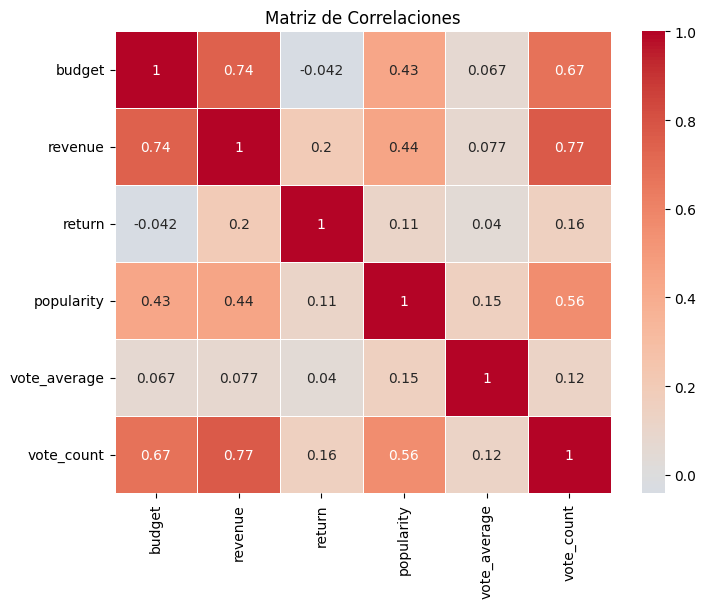

In [209]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Mostrar la gráfica
plt.title('Matriz de Correlaciones')
plt.show()

In [210]:

# Calcula los valores mínimos y máximos para cada columna
min_values = df_f7_movies_num_var.min()
max_values = df_f7_movies_num_var.max()

# Aplica la normalización min-max a cada columna
df_f7_movies_num_var_normalized = (df_f7_movies_num_var - min_values) / (max_values - min_values)

print(df_f7_movies_num_var_normalized)

         budget   revenue    return  popularity  vote_average  vote_count
0      0.077919  0.598011  0.039947    0.040087          0.77    0.384725
1      0.170127  0.571738  0.012971    0.031079          0.69    0.171439
2      0.010013  0.512060  0.008512    0.021394          0.65    0.006536
3      0.041035  0.528722  0.016332    0.007049          0.61    0.002416
4      0.010013  0.527566  0.058153    0.015320          0.57    0.012291
...         ...       ...       ...         ...           ...         ...
52670  0.010013  0.512060  0.008512    0.003069          0.60    0.000924
52728  0.010013  0.512060  0.008512    0.000056          0.00    0.000000
52729  0.010013  0.512060  0.008512    0.000015          0.00    0.000000
52738  0.010013  0.512060  0.008512    0.000123          0.70    0.000071
52763  0.010013  0.512060  0.008512    0.000685          0.61    0.000284

[45564 rows x 6 columns]


In [211]:
df_f7_movies_num_var_normalized_reduction = df_f7_movies_num_var_normalized['budget'] + df_f7_movies_num_var_normalized['revenue'] + df_f7_movies_num_var_normalized['return'] + df_f7_movies_num_var_normalized['popularity'] + df_f7_movies_num_var_normalized['vote_average'] + df_f7_movies_num_var_normalized['vote_count']

In [212]:

# Calcula los valores mínimos y máximos para cada columna
min_values = df_f7_movies_num_var_normalized_reduction.min()
max_values = df_f7_movies_num_var_normalized_reduction.max()

# Aplica la normalización min-max a cada columna
df_f7_movies_num_var_normalized_reduction_normalized = round((df_f7_movies_num_var_normalized_reduction - min_values) / (max_values - min_values),4)

print(df_f7_movies_num_var_normalized_reduction_normalized)

0        0.5138
1        0.4165
2        0.2545
3        0.2534
4        0.2489
          ...  
52670    0.2272
52728    0.0041
52729    0.0041
52738    0.2627
52763    0.2298
Length: 45564, dtype: float64


#### df_f7_movies_cat_vat:

In [213]:
df_f7_movies_cat_vat.loc[:,'super_vote'] = df_f7_movies_num_var_normalized_reduction_normalized

C:\Users\Luca\AppData\Local\Temp\ipykernel_16348\3395993247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f7_movies_cat_vat.loc[:,'super_vote'] = df_f7_movies_num_var_normalized_reduction_normalized


In [214]:
df_f7_movies_cat_vat

,title,genre_names,super_vote
0,toy story,"['animation', 'comedy', 'family']",0.5138
1,jumanji,"['adventure', 'fantasy', 'family']",0.4165
2,grumpier old men,"['romance', 'comedy']",0.2545
3,waiting to exhale,"['comedy', 'drama', 'romance']",0.2534
4,father of the bride part ii,['comedy'],0.2489
...,...,...,...
52670,true,['drama'],0.2272
52728,między nami dobrze jest,[],0.0041
52729,"włatcy móch. ćmoki, czopki i mondzioły","['comedy', 'animation']",0.0041
52738,іван сила,[],0.2627


 ### _______________________________

In [215]:
# Aplicar explode a la columna 'genre_names'
df_f7_movies_cat_vat_exploded = df_f7_movies_cat_vat.explode('genre_names')

In [216]:
df_f7_movies_cat_vat_exploded

,title,genre_names,super_vote
0,toy story,"['animation', 'comedy', 'family']",0.5138
1,jumanji,"['adventure', 'fantasy', 'family']",0.4165
2,grumpier old men,"['romance', 'comedy']",0.2545
3,waiting to exhale,"['comedy', 'drama', 'romance']",0.2534
4,father of the bride part ii,['comedy'],0.2489
...,...,...,...
52670,true,['drama'],0.2272
52728,między nami dobrze jest,[],0.0041
52729,"włatcy móch. ćmoki, czopki i mondzioły","['comedy', 'animation']",0.0041
52738,іван сила,[],0.2627


In [217]:
# Analizar las cadenas para convertirlas en listas reales
df_f7_movies_cat_vat.loc[:,'genre_names'] = df_f7_movies_cat_vat_exploded['genre_names'].apply(ast.literal_eval)

In [218]:
df_f7_movies_cat_vat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45564 entries, 0 to 52763
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        45564 non-null  object 
 1   genre_names  45564 non-null  object 
 2   super_vote   45561 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [219]:
df_f7_one_hot_genres = df_f7_movies_cat_vat.explode('genre_names')

In [220]:
df_f7_one_hot_genres

,title,genre_names,super_vote
0,toy story,animation,0.5138
0,toy story,comedy,0.5138
0,toy story,family,0.5138
1,jumanji,adventure,0.4165
1,jumanji,fantasy,0.4165
...,...,...,...
52729,"włatcy móch. ćmoki, czopki i mondzioły",animation,0.0041
52738,іван сила,NaN,0.2627
52763,šíleně smutná princezna,music,0.2298
52763,šíleně smutná princezna,comedy,0.2298


In [221]:
# Crear una tabla pivote utilizando pivot_table() con una función de agregación personalizada
df_f7_one_hot_genres = pd.pivot_table(df_f7_one_hot_genres, index='title', columns='genre_names', values='super_vote', aggfunc='sum', fill_value=0)


In [222]:
df_f7_one_hot_genres

genre_names,action,adventure,animation,aniplex,brosta tv,carousel productions,comedy,crime,documentary,drama,family,fantasy,foreign,gohands,history,horror,mardock scramble production committee,music,mystery,odyssey media,pulser productions,rogue state,romance,science fiction,sentai filmworks,telescene film group productions,the cartel,thriller,tv movie,vision view entertainment,war,western
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!women art revolution,0.0,0.0,0.0,0,0,0,0.0000,0.0000,0.1630,0.0000,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0000,0.0000
#1 cheerleader camp,0.0,0.0,0.0,0,0,0,0.1311,0.0000,0.0000,0.1311,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0000,0.0000
#chicagogirl,0.0,0.0,0.0,0,0,0,0.0000,0.0000,0.2627,0.0000,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0000,0.0000
#horror,0.0,0.0,0.0,0,0,0,0.0000,0.0000,0.0000,0.1358,0.0,0.0,0.0,0,0.0,0.1358,0,0.0,0.1358,0,0,0,0.0,0.0,0,0,0,0.1358,0.0,0,0.0000,0.0000
"$1,000 on the black",0.0,0.0,0.0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0000,0.2262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
юленька,0.0,0.0,0.0,0,0,0,0.0000,0.0000,0.0000,0.1898,0.0,0.0,0.0,0,0.0,0.1898,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.1898,0.0,0,0.0000,0.0000
هیچ کجا هیچ کس,0.0,0.0,0.0,0,0,0,0.0000,0.3735,0.0000,0.3735,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.3735,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0000,0.0000
’round midnight,0.0,0.0,0.0,0,0,0,0.0000,0.0000,0.0000,0.2535,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0000,0.0000


In [223]:
df_f7_one_hot_genres.reset_index(inplace=True)
df_f7_one_hot_genres.columns.name = None

In [224]:
df_f7_one_hot_genres.head()

,title,action,adventure,animation,aniplex,brosta tv,carousel productions,comedy,crime,documentary,drama,family,fantasy,foreign,gohands,history,horror,mardock scramble production committee,music,mystery,odyssey media,pulser productions,rogue state,romance,science fiction,sentai filmworks,telescene film group productions,the cartel,thriller,tv movie,vision view entertainment,war,western
0,!women art revolution,0.0,0.0,0.0,0,0,0,0.0000,0.0,0.1630,0.0000,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0,0.0000
1,#1 cheerleader camp,0.0,0.0,0.0,0,0,0,0.1311,0.0,0.0000,0.1311,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0,0.0000
2,#chicagogirl,0.0,0.0,0.0,0,0,0,0.0000,0.0,0.2627,0.0000,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0,0.0000
3,#horror,0.0,0.0,0.0,0,0,0,0.0000,0.0,0.0000,0.1358,0.0,0.0,0.0,0,0.0,0.1358,0,0.0,0.1358,0,0,0,0.0,0.0,0,0,0,0.1358,0.0,0,0.0,0.0000
4,"$1,000 on the black",0.0,0.0,0.0,0,0,0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0,0.0,0.0000,0,0.0,0.0000,0,0,0,0.0,0.0,0,0,0,0.0000,0.0,0,0.0,0.2262


#### Guardo df_f7_one_hot_genres:

In [226]:
df_f7_one_hot_genres.to_pickle('../../Datasets_Cleaned_light/df_f7_one_hot_genres.pkl')

### Funcion 7:

In [227]:
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

def find_similar_movies(reference_movie, n=16, cutoff=0.5):
    results = {'movie_reference': reference_movie.lower()}
    reference_movie =reference_movie.lower()
    if reference_movie in df_f7_one_hot_genres['title'].values:
        reference_row = df_f7_one_hot_genres[df_f7_one_hot_genres['title'] == reference_movie].iloc[:, 1:]
        similarities = cosine_similarity(df_f7_one_hot_genres.iloc[:, 1:], reference_row)
        df_f7_one_hot_genres['similarity'] = similarities
        similar_movies = df_f7_one_hot_genres.sort_values(by='similarity', ascending=False).head(n)
        similar_movies = similar_movies.iloc[1:]
        
        results['similar_movies'] = similar_movies[['title', 'similarity']].to_dict(orient='records')
    else:
        similar_titles = get_close_matches(reference_movie, df_f7_one_hot_genres['title'], n=n, cutoff=cutoff)
        results['suggested_titles'] = similar_titles
    
    return results

# Título de la película de referencia
reference_movie = 'Toy story'

# Llamada a la función para obtener resultados
results = find_similar_movies(reference_movie)

# Impresión de resultados en forma de lista
print("Película de referencia:", results['movie_reference'])
if 'similar_movies' in results:
    print("Películas similares:")
    for movie in results['similar_movies']:
        print(movie)
elif 'suggested_titles' in results:
    print(f"No se encontró la película '{results['movie_reference']}'. ¿Quizás quisiste decir alguna de estas?")
    print(results['suggested_titles'])


Película de referencia: toy story
Películas similares:
{'title': 'animals united', 'similarity': 1.0}
{'title': 'i want a dog for christmas, charlie brown', 'similarity': 1.0}
{'title': 'the bugs bunny/road runner movie', 'similarity': 1.0}
{'title': "charlie brown's christmas tales", 'similarity': 1.0}
{'title': 'the simpsons movie', 'similarity': 1.0}
{'title': 'anina', 'similarity': 1.0}
{'title': 'ali baba bunny', 'similarity': 1.0}
{'title': 'monsters, inc.', 'similarity': 1.0}
{'title': "surf's up", 'similarity': 1.0}
{'title': "kronk's new groove", 'similarity': 1.0}
{'title': 'the flintstones & wwe: stone age smackdown', 'similarity': 1.0}
{'title': 'madly madagascar', 'similarity': 1.0}
{'title': 'rabbit fire', 'similarity': 1.0}
{'title': 'lilo & stitch 2: stitch has a glitch', 'similarity': 1.0}
{'title': 'rabbit seasoning', 'similarity': 1.0}
